In [2]:
import pandas as pd

In [3]:
import json
from pandas.io.json import json_normalize

In [4]:
# set display options to 22 columns
pd.set_option('display.max_columns', 22)

In [5]:
# set display wider
pd.set_option('max_colwidth', 800)

In [7]:
# read in json file
yelp_df = pd.read_json('/Users/klee/Downloads/yelp_academic_dataset_business_revised.json')

In [8]:
# view first row for reference of columns and value formats
yelp_df.head(1)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB


In [8]:
# set index of dataset to business id
yelp_df_busid = yelp_df.set_index('business_id')

In [14]:
yelp_df_busid.head(1)

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,,,
Apn5Q_b6Nz61Tq4XzPdf9A,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}","Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB


In [9]:
# subset columns with non null values for categories column
cat_non_null = yelp_df_busid[yelp_df_busid['categories'].notnull()]

In [15]:
yelp_df_busid[yelp_df_busid['city'].str.contains('Scarborough')]

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,,,
MDI-evTzHguxQTcul5-5Ng,3592 St Clair Avenue E,None,"Automotive, Auto Repair, Body Shops, Car Dealers",Scarborough,"{'Monday': '8:0-18:30', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:30-13:0'}",1,43.717775,-79.256849,George's Auto Body,Scarborough,M1K 1M2,17,4.5,ON
dYo5kYQg4PMC6a-Qy3gS7Q,Esplanade,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '3', 'WiFi': 'paid'}","Event Planning & Services, Hotels & Travel, Hotels",Scarborough,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'Wednesday': '0:0-0:0', 'Thursday': '0:0-0:0', 'Friday': '0:0-0:0', 'Saturday': '0:0-0:0', 'Sunday': '0:0-0:0'}",1,54.276733,-0.399588,Crown Spa Hotel,,YO11 2AG,3,4.0,NYK
t4MDNFsoxRgbffHkXtXvOw,Seamer Road,{'BusinessAcceptsCreditCards': 'False'},"Professional Services, Car Wash, Automotive, Auto Detailing, Office Cleaning",Scarborough,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0', 'Thursday': '9:0-18:0', 'Friday': '9:0-18:0', 'Saturday': '9:0-18:0'}",1,54.265472,-0.416516,Mattys Mobile Valeting and Detailing,,YO12,4,4.0,NYK
Eurlf_tYXQABim-jhXYuVw,3478 Lawrence Avenue E,"{'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '3', 'RestaurantsTakeOut': 'True'}","Restaurants, Asian Fusion, American (New)",Scarborough,None,0,43.759860,-79.227492,Mandalay Restaurant,Scarborough,M1H 1A9,9,4.0,ON
sOJY_qnkmBttKnMR4yypaA,808 Midland Avenue,None,"Supernatural Readings, Life Coach, Professional Services, Arts & Entertainment, Career Counseling",Scarborough,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', 'Wednesday': '9:0-22:0', 'Thursday': '9:0-22:0', 'Friday': '9:0-22:0', 'Saturday': '9:0-22:0', 'Sunday': '9:0-22:0'}",0,43.734496,-79.258144,Rinas Psychic Studio,Scarborough,M1K 4E7,4,3.0,ON
iwK_skO9zTmiyl1nNyDhQg,2365 Warden Avenue,"{'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'RestaurantsPriceRange2': '2'}","Shopping, Drugstores",Scarborough,None,1,43.785133,-79.310803,Shoppers Drug Mart,Scarborough,M1T 1V7,3,3.5,ON
JRDDRyu0g5FajmZmg4VZew,5107 Sheppard Avenue E,"{'Alcohol': 'none', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'True', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'True', 'RestaurantsGoodForGroups': 'False', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'False', 'RestaurantsTableService': 'True', 'Restaura...","Food Delivery Services, Food, Caribbean, Restaurants",Scarborough,"{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0', 'Wednesday': '7:30-22:0', 'Thursday': '7:30-22:0', 'Friday': '7:30-23:0', 'Saturday': '8:0-22:0', 'Sunday': '8:0-21:0'}",1,43.793458,-79.239303,Sunrise Caribbean Restaurant,Scarborough,M1S 4N3,26,2.5,ON
CUtu_Y0_kXeAajLBBJUbPQ,43 Milner Avenue,"{'GoodForKids': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsTableService': 'False', 'RestaurantsTakeOut': 'True', 'WheelchairAccessible': 'True'}","Food, Burgers, Ice Cream & Frozen Yogurt, Restaurants",Scarborough,None,0,43.783895,-79.253097,Lick's Homeburgers & Ice Cream,Scarborough,M1S 3P6,4,2.0,ON
n-htQX5fDg1VNiTKTJsu_w,19 Glendinning Avenue,"{'Alcohol': 'none', 'Ambience': '{'romantic': False, 'intimate': Fals

In [218]:
# subset columns with null values for categories column
yelp_df_busid[yelp_df_busid['categories'].isnull()]

,address,attributes,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,,,
EBzr465prEffkpmE8Mk5AA,"Adelaide Centre, 130 Adelaide St West Concourse Level","{'BikeParking': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'ByAppointmentOnly': 'True', 'RestaurantsPriceRange2': '3'}",None,Toronto,"{'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', 'Wednesday': '7:0-19:0', 'Thursday': '7:0-19:0', 'Friday': '7:0-19:0'}",1,43.649592,-79.383394,Polish'd Nail Bar,Financial District,M5H 3P5,7,2.5,ON
CN3BLZwfG4eqZjvKrIZoAg,7700 W Arrowhead Towne Ctr,None,None,Glendale,None,1,33.642064,-112.225217,Fuzziwigs Candy Factory,,85308,4,1.0,AZ
Y76jGd_f889OT4oz9pLgZA,"20800 Center Ridge Rd, Ste 105",None,None,Rocky River,None,1,41.462730,-81.850909,Center For Effective Living,,44116,3,1.5,OH
yo8TQab_kYgAZm_DJkRjfA,"7250 N 16th St, Ste 105",None,None,Phoenix,None,1,33.543316,-112.047916,A L Financial,,85020,12,1.0,AZ
s_0zH6HExuWJeJjiZAtckA,371 Spadina Avenue,"{'BikeParking': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'WiFi': 'free'}",None,Toronto,None,1,43.655797,-79.399046,CoCo Fresh Tea & Juice,Chinatown,M5T 2G3,32,3.0,ON
v7BcP2B6IGR59ZrY4QUaYA,1158 Miles Rd,None,None,Dallas,None,1,35.374975,-81.223308,Ray's,,28034,3,1.0,NC
FXY6bj0GTWZoiA_uRng6xQ,2929 E McKellips Rd,None,None,Mesa,None,1,33.450629,-111.768880,Vista Grove Prep Academy,,85213,3,2.5,AZ
-J5SYRlH2hpv4uDs07lkqA,"3415 W Glendale Ave, Ste 3",None,None,Phoenix,None,1,33.537164,-112.132926,Aerus Electrolux,,85051,3,3.5,AZ
nR6wsc5ld4bx6NTa0ogDwQ,3055 Fremont St,None,None,Las Vegas,None,1,36.151870,-115.107819,Car Town U S A,Downtown,89104,4,1.0,NV


In [31]:
location = yelp_df[['business_id', 'address', 'neighborhood', 'postal_code','latitude', 'longitude', 'city', 'state']]

In [48]:
new_location = {}
lat = {}
long = {}
for index, row in yelp_df_busid.head(5).iterrows():
    lat[index] = round(row('latitude'))
    long[index] = round(row('longitude'))
    new_location[index] = 

#    newround(item['latitude']))

SyntaxError: invalid syntax (<ipython-input-48-64eb7af46464>, line 6)

In [44]:
new_location

{'Apn5Q_b6Nz61Tq4XzPdf9A': 51,
 'AjEbIBw6ZFfln7ePHha9PA': 36,
 'O8S5hYJ1SMc8fA4QBtVujA': 46,
 'bFzdJJ3wp3PZssNEsyU23g': 33,
 '8USyCYqpScwiNEb58Bt6CA': 51}

In [30]:
pd.pivot_table(yelp_df, index=['latitude', 'longitude', 'city', 'state'], values='business_id', aggfunc='count')
      #.sort_values('business_id', ascending=False).head(15)

,,,,business_id
latitude,longitude,city,state,
-71.753941,21.756962,Turks and Caicos Islands,FL,1
-36.086009,-115.134643,Las Vegas,NV,1
-34.869332,-58.043027,City Bell,C,1
-34.868759,-58.044275,City Bell,C,1
-34.867081,-58.043237,City Bell,C,1
-34.859989,-58.503451,Canning,C,1
-34.855213,-58.504111,Canning,C,1
-34.526852,-58.482511,Olivos,C,1
-34.520401,-58.497340,Olivos,C,1


In [20]:
yelp_df.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [25]:
import matplotlib.pyplot as plt

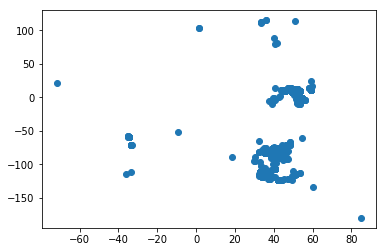

In [27]:
plt.scatter(x='latitude', y='longitude', data=yelp_df)

In [26]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [24]:
location_df = yelp_df[['business_id','address', 'city', 'latitude', 'longitude', 'neighborhood', 'postal_code', 'state']].set_index('business_id')

In [25]:
location_df.head()

,address,city,latitude,longitude,neighborhood,postal_code,state
business_id,,,,,,,
Apn5Q_b6Nz61Tq4XzPdf9A,1314 44 Avenue NE,Calgary,51.091813,-114.031675,,T2E 6L6,AB
AjEbIBw6ZFfln7ePHha9PA,,Henderson,35.960734,-114.939821,,89002,NV
O8S5hYJ1SMc8fA4QBtVujA,1335 rue Beaubien E,Montréal,45.540503,-73.599300,Rosemont-La Petite-Patrie,H2G 1K7,QC
bFzdJJ3wp3PZssNEsyU23g,211 W Monroe St,Phoenix,33.449999,-112.076979,,85003,AZ
8USyCYqpScwiNEb58Bt6CA,2005 Alyth Place SE,Calgary,51.035591,-114.027366,,T2H 0N5,AB


In [30]:
# create new column for rounded latitude values
location_df['lat'] = round(location_df.loc[:,['latitude']],0)

In [32]:
# create new column for rounded longitude values
location_df['long'] = round(location_df.loc[:,['longitude']],0)

In [33]:
location_df.head()

,address,city,latitude,longitude,neighborhood,postal_code,state,lat,long
business_id,,,,,,,,,
Apn5Q_b6Nz61Tq4XzPdf9A,1314 44 Avenue NE,Calgary,51.091813,-114.031675,,T2E 6L6,AB,51.0,-114.0
AjEbIBw6ZFfln7ePHha9PA,,Henderson,35.960734,-114.939821,,89002,NV,36.0,-115.0
O8S5hYJ1SMc8fA4QBtVujA,1335 rue Beaubien E,Montréal,45.540503,-73.599300,Rosemont-La Petite-Patrie,H2G 1K7,QC,46.0,-74.0
bFzdJJ3wp3PZssNEsyU23g,211 W Monroe St,Phoenix,33.449999,-112.076979,,85003,AZ,33.0,-112.0
8USyCYqpScwiNEb58Bt6CA,2005 Alyth Place SE,Calgary,51.035591,-114.027366,,T2H 0N5,AB,51.0,-114.0


In [82]:
location_df.pivot_table(index=['state'], values='lat', aggfunc='count').sort_values('lat', ascending=False)
                        #, aggfunc='count').sort_values('longitude', ascending=False)
#.sort_index('latitude', ascending=False)

,lat
state,
AZ,56492
NV,35687
ON,32391
NC,14359
OH,13664
PA,10966
QC,8756
AB,7670
WI,5042


In [40]:
import matplotlib.pyplot as plt

(0, 100)

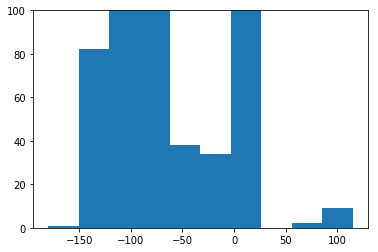

In [51]:
# histogram of longitude values
plt.hist('long', data=location_df)
plt.ylim(0,100)

(0, 100)

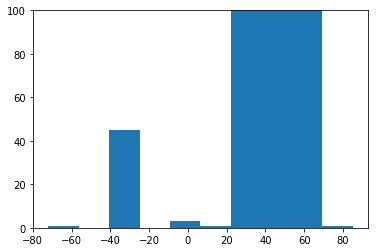

In [71]:
# histogram of latitude values
plt.hist('lat', data=location_df)
plt.ylim(0,100)